In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

In [2]:
# Import data
df = pd.read_csv("/content/drive/MyDrive/Data Science/Self Project/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df["TotalCharges"] = df["TotalCharges"].str.replace(" ", "", regex=True)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

In [5]:
df.iloc[[488,753]]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Each object columns unique values
cols_object = [col for col in df.columns if df[col].dtype == "object"]
for cols in cols_object:
  print(str(cols) + ".unique() : " + str(df[cols].unique()))

customerID.unique() : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender.unique() : ['Female' 'Male']
Partner.unique() : ['Yes' 'No']
Dependents.unique() : ['No' 'Yes']
PhoneService.unique() : ['No' 'Yes']
MultipleLines.unique() : ['No phone service' 'No' 'Yes']
InternetService.unique() : ['DSL' 'Fiber optic' 'No']
OnlineSecurity.unique() : ['No' 'Yes' 'No internet service']
OnlineBackup.unique() : ['Yes' 'No' 'No internet service']
DeviceProtection.unique() : ['No' 'Yes' 'No internet service']
TechSupport.unique() : ['No' 'Yes' 'No internet service']
StreamingTV.unique() : ['No' 'Yes' 'No internet service']
StreamingMovies.unique() : ['No' 'Yes' 'No internet service']
Contract.unique() : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling.unique() : ['Yes' 'No']
PaymentMethod.unique() : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn.unique() : ['No' 'Yes']


In [8]:
df_groupby = df.groupby(["gender", "Churn"], as_index=False)[["MonthlyCharges", "TotalCharges"]].count()
display(df_groupby.head())

,gender,Churn,MonthlyCharges,TotalCharges
0,Female,No,2549,2544
1,Female,Yes,939,939
2,Male,No,2625,2619
3,Male,Yes,930,930


In [9]:
# Drop customer id
df.drop(columns=["customerID"], inplace=True)

## Exploratory Data Analysis
Exploring some insight in order to get familiarized with the data. The key insight we want to extract :
1. Is there any pattern in churn based on gender?
2. Is there any pattern in churn based on service?
3. etc

In [ ]:
# import chart_studio.plotly as py
# import plotly.express as px
# import plotly.graph_objects as go
# import plotly.subplots as make_subplots
# import cufflinks as cf

# from plotly.offline import download_plotlyjs, init_notebook_mode, plot
# init_notebook_mode(connected=True)
# cf.go_offline()

Female Percentage : 0.495243504188556
Male Percentage : 0.504756495811444
Churn Percentage : 0.2653698707936959
Not Churn Percentage : 0.7346301292063041


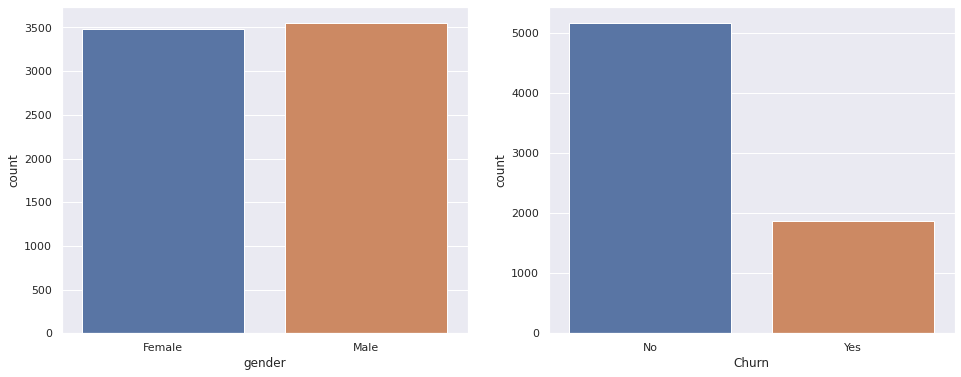

In [10]:
# Gender and Churn Distribution
sns.set_theme()
fig, axes = plt.subplots(1, 2, figsize=(16,6))

sns.countplot(x="gender", data=df, ax=axes[0])
sns.countplot(x="Churn", data=df, ax=axes[1])

# Add Percentage
perc_female = df["gender"].value_counts().Female / df.shape[0]
perc_male = df["gender"].value_counts().Male / df.shape[0]
perc_churn = df["Churn"].value_counts().Yes / df.shape[0]
perc_not_churn = df["Churn"].value_counts().No / df.shape[0]

print("Female Percentage :", perc_female)
print("Male Percentage :", perc_male)
print("Churn Percentage :", perc_churn)
print("Not Churn Percentage :", perc_not_churn)

The gender distribution in our data is balanced although there are small differences. In contrast, in our data there are more people who choose to stay in the subscription than decide to leave within last month

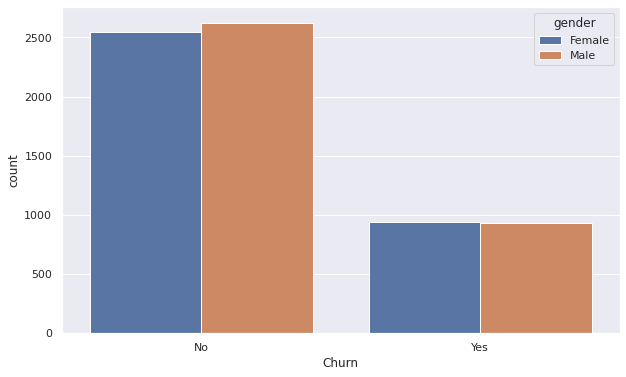

In [11]:
# Churn Distribution based on gender
plt.figure(figsize=(10,6))
figp = sns.countplot(x="Churn", data=df, hue="gender")

class_order = ["No", "Yes"]
hue_order = ["Female", "Male"]
bar_order = product(class_order, hue_order)

# spots = zip(figp.patches, bar_order)
# for spot in spots:
#     class_total = len(df[df['Churn']==spot[1][0]])
#     class_who_total = len(df[(df['Churn']==spot[1][0]) & 
#         (df['gender']==spot[1][1])])
#     height = spot[0].get_height() 
#     figp.text(spot[0].get_x()+0.18, height+3, '{:1.2f}'.format(class_who_total/class_total))

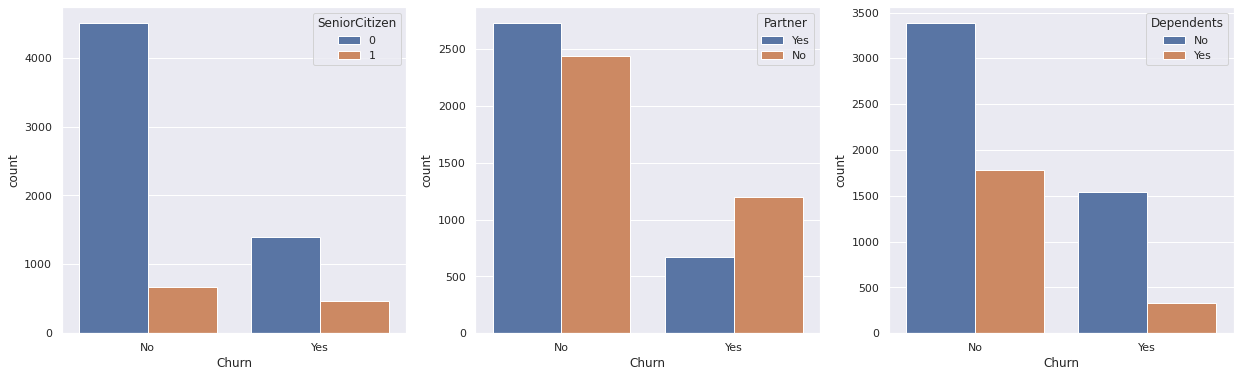

In [12]:
# Partner and dependent distribution based on customer's "churn" or no
fig, axes = plt.subplots(1, 3, figsize=(21,6))

sns.countplot(x="Churn", hue="SeniorCitizen", data=df, ax=axes[0])
sns.countplot(x="Churn", hue="Partner", data=df, ax=axes[1])
sns.countplot(x="Churn", hue="Dependents", data=df, ax=axes[2])

1. Customers who's not senior yet are more likely to continue the subscription
2. Customer who continue the subscription are more likely have partner. As oppose, "Churn" customers are more likely don't have partner.
3. Customer who decide to continue or discontinue the subscription are more likely don't have dependents.

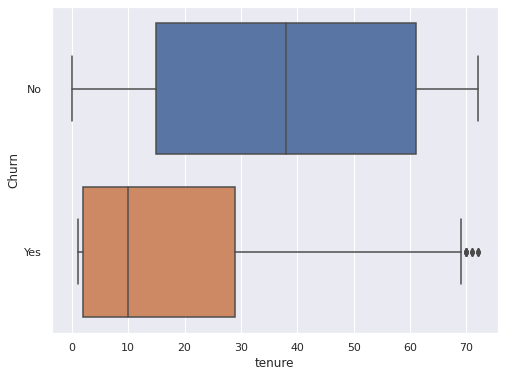

In [13]:
# Tenure distribution based on whether customer is "churn" or "not churn"
plt.figure(figsize=(8,6))

sns.boxplot(x="tenure", y="Churn", data=df)

Customer who continue the subscription has on average spend 38 months on their subscription. In other side, customer who discontinue the subscription has on average spend only 10 months on their subscription

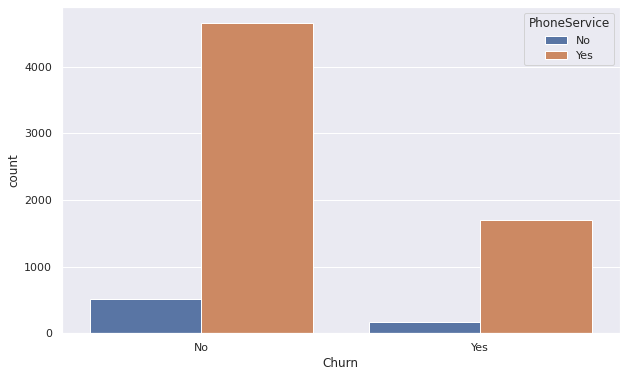

In [14]:
# Churn distribution based on service
# 1. Phone Service
# Churn Distribution based on gender
plt.figure(figsize=(10,6))
figp = sns.countplot(x="Churn", data=df, hue="PhoneService")

class_order = ["No", "Yes"]
hue_order = ["No", "Yes"]
bar_order = product(class_order, hue_order)

# spots = zip(figp.patches, bar_order)
# for spot in spots:
#     class_total = len(df[df['Churn']==spot[1][0]])
#     class_who_total = len(df[(df['Churn']==spot[1][0]) & 
#         (df['PhoneService']==spot[1][1])])
#     height = spot[0].get_height() 
#     figp.text(spot[0].get_x()+0.18, height+3, '{:1.2f}'.format(class_who_total/class_total))

People who choose to continue the subscription are more likely to have phone service than people who discontinue as we can see the differences between people who has phone service and no is much bigger than differences in people who choose to discontinue.

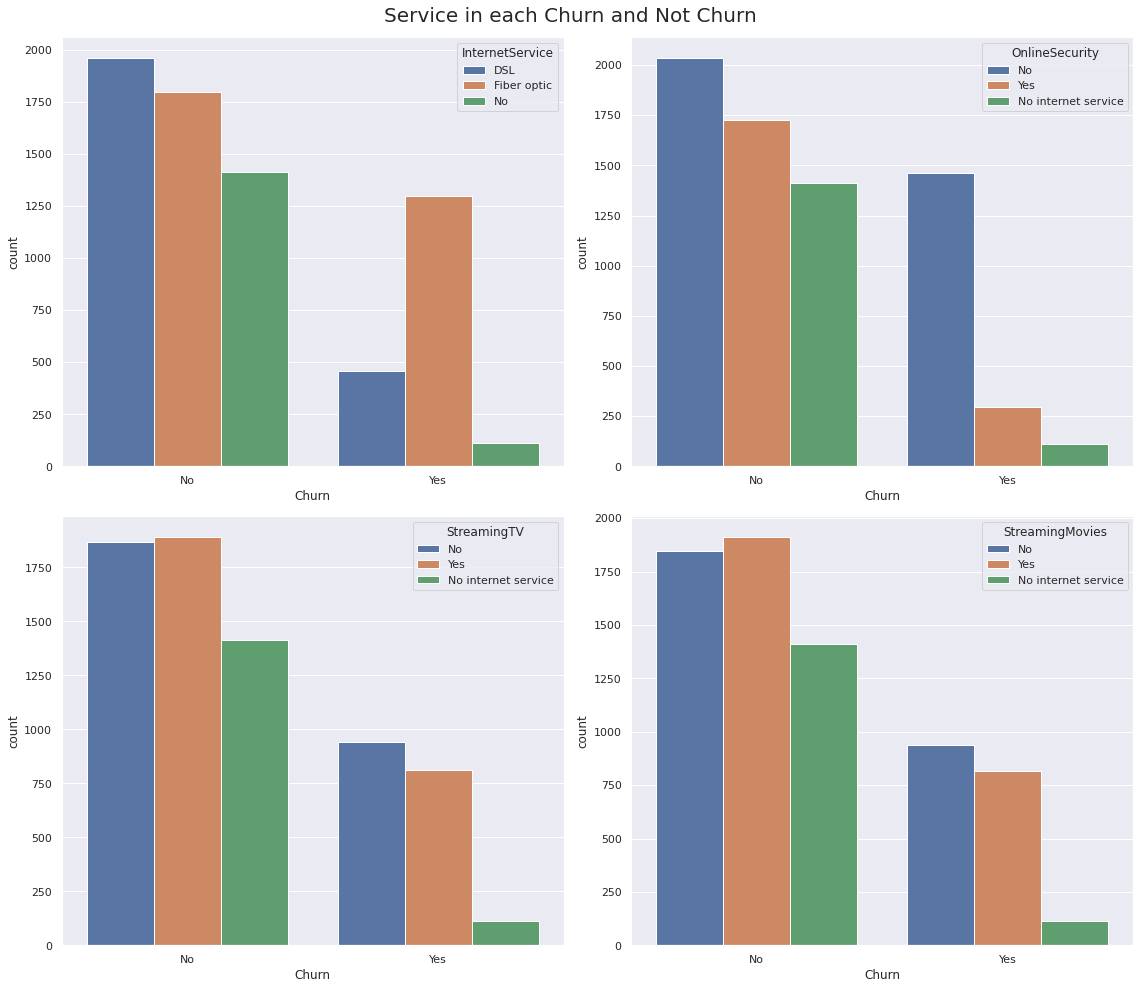

In [15]:
# Internet service, Online Security, TV streaming, movies streaming trend between churn and no churn
fig, axes = plt.subplots(2,2, figsize=(16,14))

cols_serv = ["InternetService", "OnlineSecurity", "StreamingTV", "StreamingMovies"] 

for i in range(2):
  for j in (range(2)):
    sns.countplot(x="Churn", hue=cols_serv[2*i+j], data=df, ax=axes[i,j])

plt.suptitle("Service in each Churn and Not Churn", fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)

1. People who choose to discontinue tend to prefer fiber optic ISP over DSL and rarely prefer to have no iSP. In other side, customer who decide to continue has freferred DSL over fiber optic and non ISP
2. Customer who preferred no online security are more likely to discontinue the subscription. It is because the difference between customer who preferred no online security and online security which decide to discontinue the subscription is much bigger than customers who decide to continue the subscription
3. Customer who decide to continue the subscription are tend to preferred TV streaming service over non TV streaming. As oppose, customer who decide to discontinue the TV streaming are tend to preferred no TV sreaming service over TV streaming service
4. Similiar to TV subscription, Customer who decide to continue the subscription are tend to preferred movie streaming service over non movie streaming. As oppose, customer who decide to discontinue the subscription are tend to preferred no movie sreaming service over movie streaming service

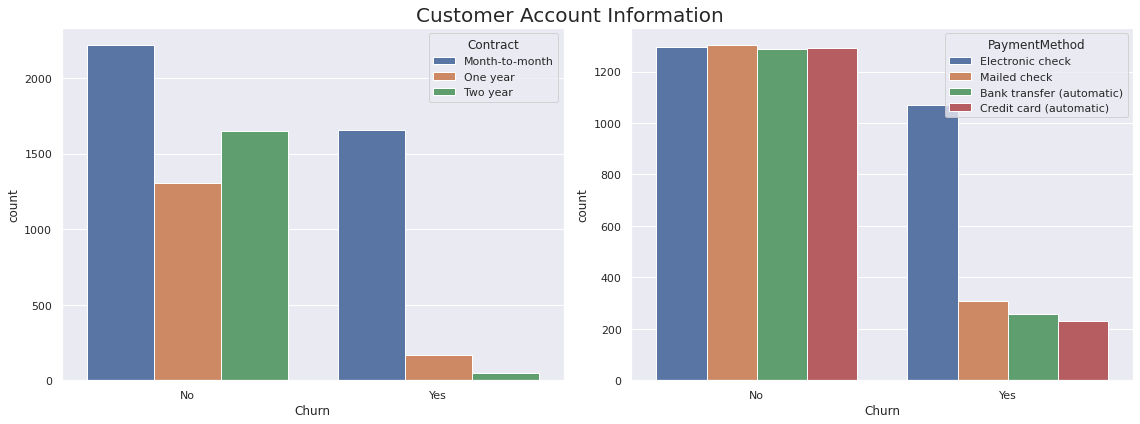

In [16]:
# Internet service, Online Security, TV streaming, movies streaming trend between churn and no churn
fig, axes = plt.subplots(1,2, figsize=(16,6))

cols_serv = ["Contract", "PaymentMethod"] 

for i in range(2):
    sns.countplot(x="Churn", hue=cols_serv[i], data=df, ax=axes[i])

plt.suptitle("Customer Account Information", fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.93)

1. Customers who preferred Month-to-month contract over one year on two year contract are more likely to discontinue the subscription because of the big differences between month-to-month and one year or two year contract for customer who discontinue the subscription compared to customer who continue the subscription.
2. Customers who decide to continue the subscription is has equal likely chance to choose 4 payment methods. In other case, customer who decide to discontinue the subscription are more likely to choose electronic check as payment method.

### Checking Outliers in continue value columns.
We check outliers by inspecting KDE (Kernel Density Estimate) plots and by using IQR (Interquartile Range) method

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


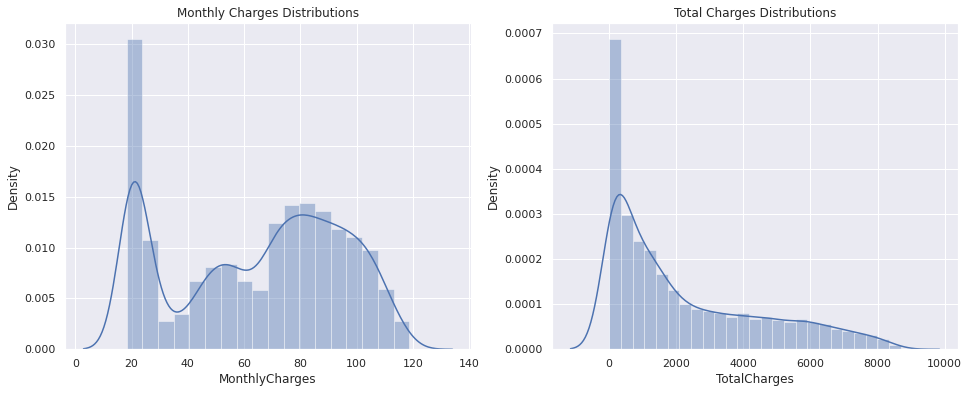

In [17]:
# Inspect KDE plots
fig, axes= plt.subplots(1,2, figsize=(16,6))

sns.distplot(df["MonthlyCharges"],  ax=axes[0])
axes[0].set_title("Monthly Charges Distributions")
sns.distplot(df["TotalCharges"], ax=axes[1])
axes[1].set_title("Total Charges Distributions")

plt.show()

There are no tails in left and right plot. Therefore, there are no outliers based on KDE plots

In [18]:
def check_outliers(df, cols):
  # Taking q1, q2, and q3 of data
  q1, q3 = np.quantile(df[cols], [0.25, 0.75])
  # IQR 
  iqr = q3 - q1
  # Upper and lower limit
  upper_lim = q3 + 1.5 * iqr
  lower_lim = q1 - 1.5 * iqr
  # checking outliers
  outliers = df.loc[(df[cols] > upper_lim) | (df[cols] < lower_lim), cols]
  return outliers

In [19]:
# Searching and outputting outliers for MonthlyCharges and TotalCharges columns
print("Monthly Charges Outliers :", check_outliers(df, "MonthlyCharges").values)
print("Total Charhes Outliers :", check_outliers(df, "TotalCharges").values)

Monthly Charges Outliers : []
Total Charhes Outliers : []


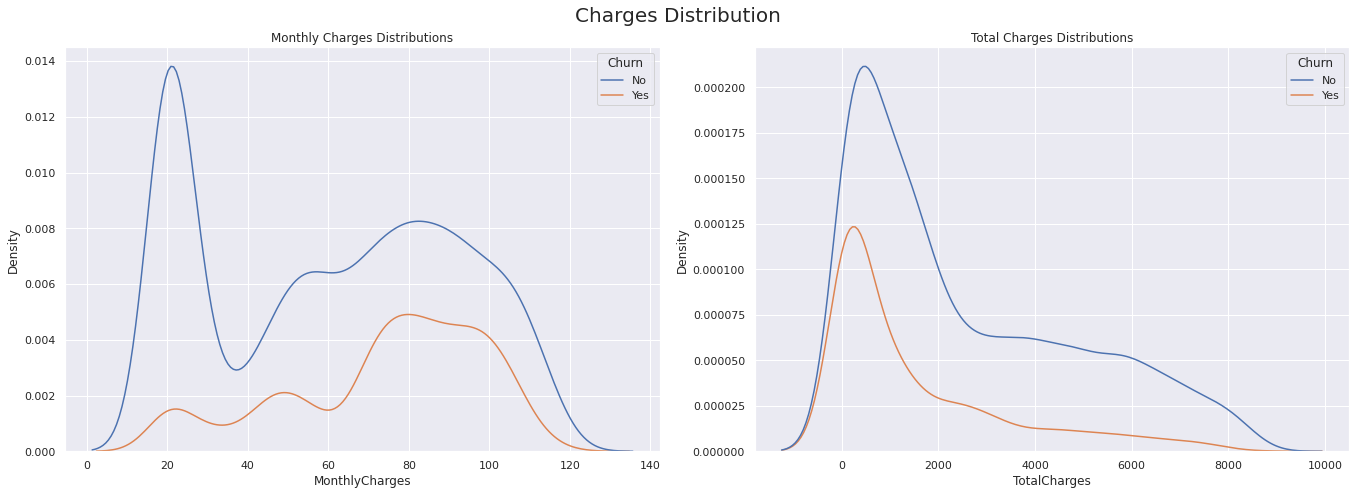

In [20]:
# Monthly charges and total charges distribution based on whether customers'churn or not churn
fig, axes= plt.subplots(1,2, figsize=(19,7))

sns.kdeplot(x="MonthlyCharges",  hue="Churn", data=df, ax=axes[0])
axes[0].set_title("Monthly Charges Distributions")
sns.kdeplot(x="TotalCharges",  hue="Churn", data=df, ax=axes[1])
axes[1].set_title("Total Charges Distributions")

plt.suptitle("Charges Distribution", fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.90)

Text(0.5, 1.0, 'Total Charges Box Plot')

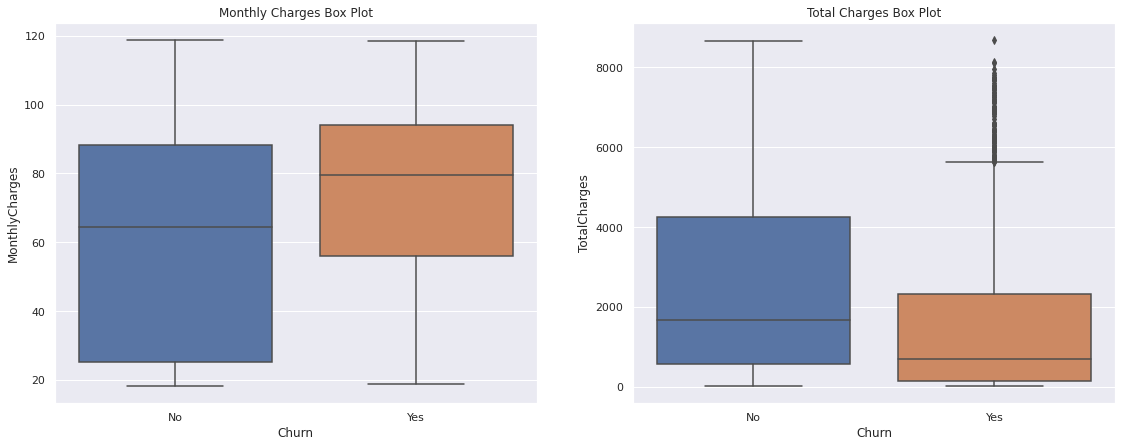

In [21]:
# Create box plot on Monthly Charges and Total Charges data based on customer's churn
fig, axes = plt.subplots(1, 2, figsize=(19,7))

sns.boxplot(x="Churn",  y="MonthlyCharges", data=df, ax=axes[0])
axes[0].set_title("Monthly Charges Box Plot")
sns.boxplot(x="Churn",  y="TotalCharges", data=df, ax=axes[1])
axes[1].set_title("Total Charges Box Plot")

1. On average, customers who discontinue the subscription paid higher on monthly charges than customers who continue the subscription
2. In contrast with monthly charges trends, customers who continue their subscription on average paid their total charges higher than sutomers who discontinue the subscription. I suspect the "churn" customers tends to sign up more service that made them interested in continuing their subscription

## Data Cleaning and Pre-Processing

In [22]:
# seeing the data again
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
# Convert data type
# df["SeniorCitizen"] = df["SeniorCitizen"].astype("category")

### Label and One-Hot Encoding

In [24]:
# Label Encoding category variable
cols = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in cols:
  df[col] = encoder.fit_transform(df[col])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [26]:
df.dropna(inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 


In [28]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [29]:
# get columns which contain more than 2 unique values
cols_more_2 = []
for cols in df.columns:
  if (df[cols].dtypes == "object" and df[cols].nunique() > 2):
    cols_more_2.append(cols)

In [30]:
# Make dummy variable
df_dummy = df[cols_more_2]
df.drop(columns=cols_more_2, inplace=True)
df_dummy = pd.get_dummies(df_dummy)
df = pd.concat([df_dummy, df], axis=1)

In [31]:
cols_more_2

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [32]:
print("Churn 1 :" + str(df[df["Churn"]==1].shape[0]))
print("Churn 0 :" + str(df[df["Churn"]==0].shape[0]))

Churn 1 :1869
Churn 0 :5163


### Oversampling

In [52]:
oversampling_tehnique = str(input("Oversampling Technique?(usual/smote) : "))
if oversampling_tehnique == "usual":
  from sklearn.utils import resample, shuffle
  # Oversampling Churn column
  zero = df[df["Churn"]==0]
  one = df[df["Churn"]==1]

  df_minor_upsampled = resample(one, replace=True, n_samples=5000)

  # Concatenate with old data
  df = pd.concat([zero, df_minor_upsampled])

  # shuffling df
  df = shuffle(df)

  # Oversampling SeniorCitizen columns
  sc = df[df["SeniorCitizen"]==1]
  not_sc = df[df["SeniorCitizen"]==0]

  ps_oversampled = resample(sc, replace=True, n_samples=6000)

  # Concatenate with old data
  df = pd.concat([not_sc, ps_oversampled])

  # Shuffling df
  df = shuffle(df)

Oversampling Technique?(usual/smote) : usual


In [53]:
oversampling_tehnique

'usual'

In [54]:
print("Churn 1 :" + str(df[df["Churn"]==1].shape[0]))
print("Churn 0 :" + str(df[df["Churn"]==0].shape[0]))

Churn 1 :7691
Churn 0 :6535


In [55]:
print("Senior Citizen (1) " + str(df[df["SeniorCitizen"]==1].shape[0]))
print("Not Senior Citizen (0) " + str(df[df["SeniorCitizen"]==0].shape[0]))

Senior Citizen (1) 6000
Not Senior Citizen (0) 8226


In [56]:
df.head(5)

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
6141,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,1,1,0,52,1,1,104.20,5568.35,1
1944,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,8,0,0,25.50,215.20,1
4826,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,8,1,1,105.50,829.55,1
1345,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,57,1,1,100.75,5985.00,0
383,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,1,90.85,90.85,1


In [57]:
df.shape

(14226, 41)

In [58]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [59]:
df_new_1 = clean_dataset(df)
df_new_1.shape

(14226, 41)

In [60]:
df_new_1.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
6141,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,52.0,1.0,1.0,104.20,5568.35,1.0
1944,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,8.0,0.0,0.0,25.50,215.20,1.0
4826,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,8.0,1.0,1.0,105.50,829.55,1.0
1345,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,57.0,1.0,1.0,100.75,5985.00,0.0
383,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,90.85,90.85,1.0


In [61]:
df_new_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14226 entries, 6141 to 3972
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   MultipleLines_No                         14226 non-null  float64
 1   MultipleLines_No phone service           14226 non-null  float64
 2   MultipleLines_Yes                        14226 non-null  float64
 3   InternetService_DSL                      14226 non-null  float64
 4   InternetService_Fiber optic              14226 non-null  float64
 5   InternetService_No                       14226 non-null  float64
 6   OnlineSecurity_No                        14226 non-null  float64
 7   OnlineSecurity_No internet service       14226 non-null  float64
 8   OnlineSecurity_Yes                       14226 non-null  float64
 9   OnlineBackup_No                          14226 non-null  float64
 10  OnlineBackup_No internet service         142

In [62]:
df_new_1 = df_new_1.reset_index()

In [63]:
df_new_1.head()

,index,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,6141,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,52.0,1.0,1.0,104.20,5568.35,1.0
1,1944,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,8.0,0.0,0.0,25.50,215.20,1.0
2,4826,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,8.0,1.0,1.0,105.50,829.55,1.0
3,1345,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,57.0,1.0,1.0,100.75,5985.00,0.0
4,383,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,90.85,90.85,1.0


In [64]:
y = df_new_1["Churn"]
X = df_new_1.drop(columns=["Churn", "index"])

In [65]:
X.shape, y.shape

((14226, 40), (14226,))

In [66]:
X.head(), y.head()

(   MultipleLines_No  ...  TotalCharges
 0               0.0  ...       5568.35
 1               0.0  ...        215.20
 2               0.0  ...        829.55
 3               0.0  ...       5985.00
 4               0.0  ...         90.85
 
 [5 rows x 40 columns], 0    1.0
 1    1.0
 2    1.0
 3    0.0
 4    1.0
 Name: Churn, dtype: float64)

### Oversampling with SMOTE

In [ ]:
if oversampling_tehnique == "smote":
  from imblearn.over_sampling import SMOTE
  from imblearn.under_sampling import RandomUnderSampler
  from imblearn.pipeline import Pipeline

  smote = SMOTE(sampling_strategy=0.9)
  undersampler = RandomUnderSampler(sampling_strategy=0.7, replacement=True)

  pipeline = Pipeline([('smote', smote), ('undersampler', undersampler)])
  X, y = pipeline.fit_resample(X, y)
  # X, y = undersampler.fit_resample(X, y)

In [ ]:
X.shape

(10453, 40)

## Predictive Modelling

In [67]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow import keras

In [68]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12803, 40), (1423, 40), (12803,), (1423,))

In [69]:
print(np.any(np.isfinite(X_train)))
print(np.any(np.isnan(X_train)))

True
False


### ANN

In [71]:
scaler_MM = MinMaxScaler()
X_train_sc = scaler_MM.fit_transform(X_train)
X_test_sc = scaler_MM.transform(X_test)

In [72]:
model = keras.Sequential()
model.add(keras.layers.Dense(50, input_shape=(40,), activation="relu"))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

# Compiling MOdel
auc = keras.metrics.AUC()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', auc])

# Fitting Model
model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=50)

Epoch 1/50
401/401 [==============================] - 2s 3ms/step - loss: 0.5106 - accuracy: 0.7550 - auc_1: 0.8242 - val_loss: 0.4708 - val_accuracy: 0.7779 - val_auc_1: 0.8510
Epoch 2/50
401/401 [==============================] - 1s 2ms/step - loss: 0.4766 - accuracy: 0.7694 - auc_1: 0.8489 - val_loss: 0.4590 - val_accuracy: 0.7836 - val_auc_1: 0.8593
Epoch 3/50
401/401 [==============================] - 1s 2ms/step - loss: 0.4688 - accuracy: 0.7740 - auc_1: 0.8547 - val_loss: 0.4490 - val_accuracy: 0.7758 - val_auc_1: 0.8629
Epoch 4/50
401/401 [==============================] - 1s 2ms/step - loss: 0.4575 - accuracy: 0.7830 - auc_1: 0.8618 - val_loss: 0.4455 - val_accuracy: 0.7829 - val_auc_1: 0.8653
Epoch 5/50
401/401 [==============================] - 1s 2ms/step - loss: 0.4476 - accuracy: 0.7875 - auc_1: 0.8685 - val_loss: 0.4465 - val_accuracy: 0.7948 - val_auc_1: 0.8632
Epoch 6/50
401/401 [==============================] - 1s 2ms/step - loss: 0.4394 - accuracy: 0.7942 - auc_1: 0

In [ ]:
model.evaluate(X_test_sc, y_test)

45/45 [==============================] - 0s 4ms/step - loss: 0.3447 - accuracy: 0.8521 - auc_3: 0.9262


[0.3447458744049072, 0.8521126508712769, 0.9261831045150757]

In [ ]:
y_pred_proba = model.predict(X_test_sc)
y_pred_proba = y_pred_proba.reshape(-1,)
y_pred_proba

array([8.9466667e-01, 9.9090517e-01, 3.0434132e-04, ..., 4.3073574e-01,
       9.6089804e-01, 5.9487224e-03], dtype=float32)

### Logistic Regression

In [73]:
# Make Pipeline
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('clf', LogisticRegression())])
# Params
c_space = np.logspace(-5,8, 10)
param_grid = {'clf__C':c_space, 'clf__penalty':['linear', 'l1','l2'], 'clf__fit_intercept':[True, False]}
# Make KFold
cv = KFold(n_splits=5, shuffle=True)
# Grid Search model
logreg_cv = GridSearchCV(pipeline, param_grid=param_grid, scoring="accuracy", cv=cv)
logreg_cv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
200 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', LogisticRegression())]),
             param_grid={'clf__C': array([1.00000000e-05, 2.78255940e-04, 7.74263683e-03, 2.15443469e-01,
       5.99484250e+00, 1.66810054e+02, 4.64158883e+03, 1.29154967e+05,
       3.59381366e+06, 1.00000000e+08]),
                         'clf__fit_intercept': [True, False],
                         'clf__penalty': ['linear', 'l1', 'l2']},
             scoring='accuracy')

In [74]:
logreg_cv.best_params_, logreg_cv.best_score_

({'clf__C': 5.994842503189409,
  'clf__fit_intercept': False,
  'clf__penalty': 'l2'},
 0.7671632785044904)

In [75]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

lr = LogisticRegression(C = 5.994842503189409, penalty='l2', fit_intercept=False)
lr.fit(X_train_sc, y_train)
y_pred_lr = lr.predict(X_test_sc)
y_pred_lr_proba = lr.predict_proba(X_test_sc)[:,1]

In [ ]:
accuracy_score(y_test, lr.predict(X_test))

Text(30.5, 0.5, 'Truth')

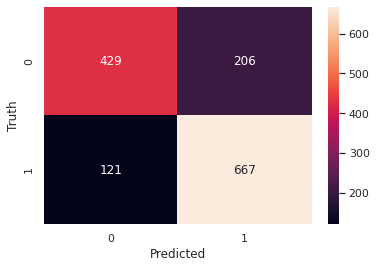

In [ ]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

### Random Forest

In [ ]:
# Make Pipeline
pipeline = Pipeline([('clf', RandomForestClassifier())])
# Params
param_grid = {'clf__n_estimators':[250, 300, 500, 750],
              'clf__max_features':['auto'], 'clf__max_depth':[90, 100, 110],
              'clf__bootstrap':[True]}
# Make KFold
cv = KFold(n_splits=5)
# Grid Search model
rfc_cv = GridSearchCV(pipeline, param_grid=param_grid, scoring="accuracy", cv=cv)
rfc_cv.fit(X_train, y_train)

In [ ]:
rfc_cv.best_params_, rfc_cv.best_score_

({'clf__bootstrap': True,
  'clf__max_depth': 90,
  'clf__max_features': 'auto',
  'clf__n_estimators': 300},
 0.8912097446423288)

In [ ]:
#got the best parameters above
scaler = StandardScaler()
X_train_sca = scaler.fit_transform(X_train)
X_test_sca = scaler.transform(X_test)

rfc_sc = RandomForestClassifier(bootstrap=True, max_depth=90, n_estimators = 300, max_features="auto")

rfc_sc.fit(X_train_sca, y_train)
y_pred_rf = rfc_sc.predict(X_test_sca)
y_pred_rf_proba = rfc_sc.predict_proba(X_test_sc)[:,1]

In [ ]:
print(classification_report(y_test, rfc_sc.predict(X_test_sca)))

              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95       678
         1.0       0.93      0.98      0.96       742

    accuracy                           0.95      1420
   macro avg       0.96      0.95      0.95      1420
weighted avg       0.95      0.95      0.95      1420



In [ ]:
print(accuracy_score(y_test, rfc_sc.predict(X_test_sca)))

0.9535211267605633


In [ ]:
print(classification_report(y_test, rfc_sc.predict(X_test_sca)))

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.94       635
         1.0       0.94      0.97      0.95       788

    accuracy                           0.95      1423
   macro avg       0.95      0.95      0.95      1423
weighted avg       0.95      0.95      0.95      1423



Text(33.0, 0.5, 'Truth')

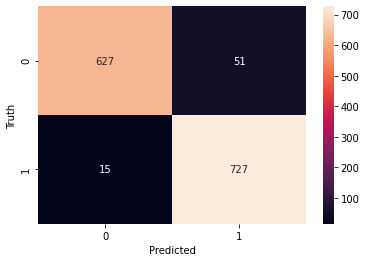

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), fmt="d", annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

Text(30.5, 0.5, 'Truth')

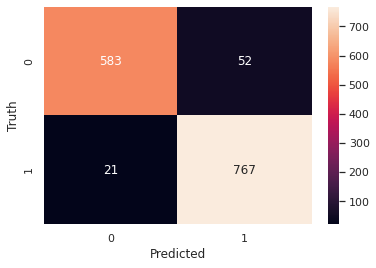

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), fmt="d", annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
#got the best parameters above (withoit scaled)
scaler = StandardScaler()
X_train_sca = scaler.fit_transform(X_train)
X_test_sca = scaler.transform(X_test)

rfc = RandomForestClassifier(bootstrap=True, max_depth=90, n_estimators = 300, max_features="auto")

rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=90, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print(classification_report(y_test, rfc.predict(X_test)))
print(accuracy_score(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95       678
         1.0       0.93      0.98      0.96       742

    accuracy                           0.95      1420
   macro avg       0.96      0.95      0.95      1420
weighted avg       0.95      0.95      0.95      1420

0.9535211267605633


In [ ]:
print(classification_report(y_test, rfc.predict(X_test)))
print(accuracy_score(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       635
         1.0       0.94      0.97      0.95       788

    accuracy                           0.95      1423
   macro avg       0.95      0.94      0.95      1423
weighted avg       0.95      0.95      0.95      1423

0.9472944483485594


### XGBoost

In [ ]:
# Make pipeline
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('clf', XGBClassifier())])

params_grid = {'clf__n_estimators': [100,400,800], 'clf__learning_rate': [0.3,0.5,1],
             'clf__max_depth': [6,8,15], 'clf__eval_metric':['auc'], 'clf__use_label_encoder':[False], 'clf__objective':['binary:logistic']}

xgb_cv = GridSearchCV(pipeline, param_grid=params_grid, cv=5, scoring='accuracy')
xgb_cv.fit(X_train, y_train) 

In [ ]:
xgb_cv.best_params_, xgb_cv.best_score_

In [ ]:
#got the best parameters above
scaler = StandardScaler()
X_train_sca = scaler.fit_transform(X_train)
X_test_sca = scaler.transform(X_test)

xgb_1 = XGBClassifier(learning_rate = 0.3, max_depth = 15, n_estimators = 400,
                    eval_metric = 'auc',
                    use_label_encoder=False, 
                    objective = 'binary:logistic', random_state = 42)
xgb_1.fit(X_train_sca, y_train)
y_pred_xgb = xgb_1.predict(X_test_sca)
y_pred_xgb_proba = xgb_1.predict_proba(X_test_sca)[:,1]
print(classification_report(y_test, xgb_1.predict(X_test_sca)))

              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94       678
         1.0       0.92      0.98      0.95       742

    accuracy                           0.94      1420
   macro avg       0.95      0.94      0.94      1420
weighted avg       0.95      0.94      0.94      1420



In [ ]:
print(y_pred_xgb)
print(xgb_1.predict_proba(X_test_sca)[:,1])

[0. 1. 1. ... 0. 1. 0.]
[4.1621487e-04 9.9580896e-01 9.8589778e-01 ... 3.4815359e-05 8.4203053e-01
 2.0570112e-02]


In [ ]:
accuracy_score(y_test, xgb_1.predict(X_test_sca))

0.9436619718309859

Text(33.0, 0.5, 'Truth')

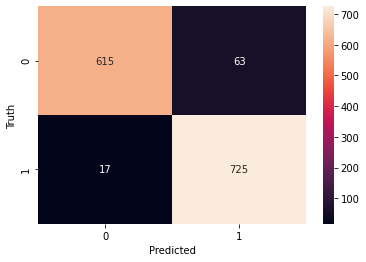

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), fmt="d", annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
#got the best parameters above
scaler = StandardScaler()
X_train_sca = scaler.fit_transform(X_train)
X_test_sca = scaler.transform(X_test)

xgb = XGBClassifier(learning_rate = 0.3, max_depth = 25, n_estimators = 400,
                    eval_metric = 'auc',
                    use_label_encoder=False, 
                    objective = 'binary:logistic', random_state = 42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, learning_rate=0.3, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, use_label_encoder=False, verbosity=1)

In [ ]:
accuracy_score(y_test, xgb.predict(X_test))

0.9430780042164442

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Prediction Probability (XGB)')

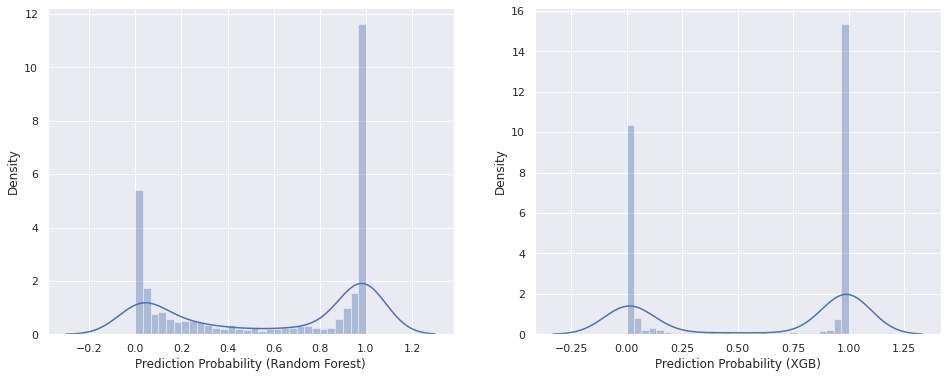

In [ ]:
# Distribution of predict probability by random forest classifier
fig, axes = plt.subplots(1,2, figsize=(16,6))
sns.distplot(y_pred_rf_proba, bins=30, label="Random Forest", ax=axes[0])
axes[0].set_xlabel("Prediction Probability (Random Forest)")
sns.distplot(y_pred_xgb_proba, bins=30, label="XGB", ax=axes[1])
axes[1].set_xlabel("Prediction Probability (XGB)")

Text(30.5, 0.5, 'Truth')

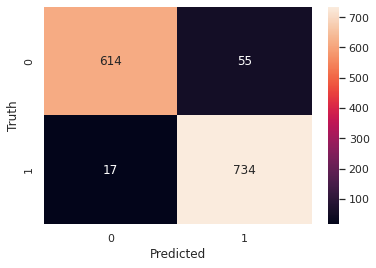

In [ ]:
sns.heatmap(confusion_matrix(y_test, xgb.predict(X_test)), fmt="d", annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

Text(0, 0.5, 'True Positive Rate')

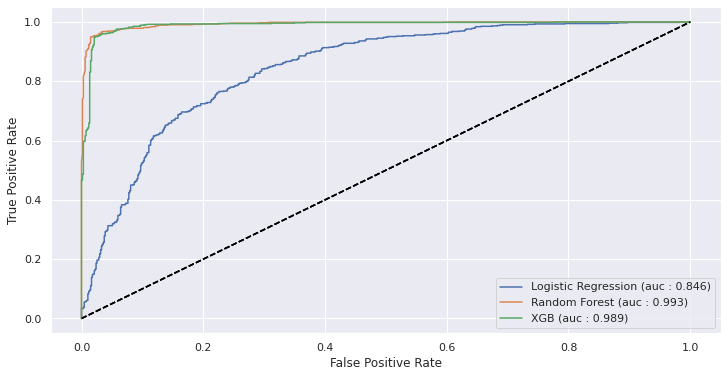

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(12,6))
x = [0, 0.5, 1]
for y_pred, clf_name in zip([y_pred_lr_proba, y_pred_rf_proba, y_pred_xgb_proba], ["Logistic Regression", "Random Forest", "XGB"]):
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  plt.plot(fpr, tpr, label="{} (auc : {:.3f})".format(clf_name, float(roc_auc_score(y_test, y_pred))))
  plt.plot(x, x, linestyle='dashed', color='black')

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [ ]:
roc_auc_score(y_test, y_pred_lr_proba)

0.8458885909967576

### Our Final Model
The best model with highest accuracy is random forest classifier with parameters:
1. bootstrap = True
2. max_depth = 90
3. n_estimators = 300
4. max_features = auto

In [ ]:
rfc = RandomForestClassifier(bootstrap=True, max_depth=90, n_estimators = 300, max_features="auto")

rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=90, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Predicting
y_pred = rfc.predict(X_test)
y_pred

array([0., 1., 0., ..., 0., 1., 1.])

In [ ]:
# Looking at accuracy and classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.94       670
         1.0       0.93      0.97      0.95       752

    accuracy                           0.95      1422
   macro avg       0.95      0.94      0.95      1422
weighted avg       0.95      0.95      0.95      1422



In [ ]:
df_score = pd.DataFrame({"Model":["Artifial Neural Network", "Logistic Regression", "Random Forest", "XGBoost"], 
                         "Accuracy Score" : [0.926183, 0.767613, 0.953521, 0.943661]})
df_score.set_index("Model", inplace=True)
df_score

,Accuracy Score
Model,
Artifial Neural Network,0.926183
Logistic Regression,0.767613
Random Forest,0.953521
XGBoost,0.943661
